In [2]:
import pandas as pd

ratings = pd.read_csv("D:/추천알고리즘강의/data/ml-latest-small/ratings.csv")
ratings.sample()

In [4]:
ratings.shape

(100836, 4)

In [5]:
print(len(ratings['userId'].unique()))
print(len(ratings['movieId'].unique()))

610
9724


In [6]:
print(" 평균값 : ", ratings['rating'].mean(),"\n","최댓값 : ",ratings['rating'].max(),"\n","최솟값 : ",ratings['rating'].min())

 평균값 :  3.501556983616962 
 최댓값 :  5.0 
 최솟값 :  0.5


In [7]:
ratings["rating"].describe() #std : 표준편차

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:>

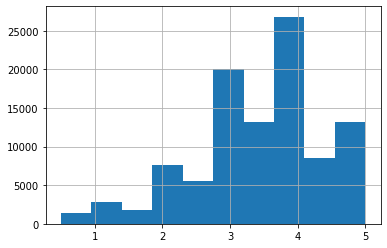

In [8]:
%matplotlib inline
ratings['rating'].hist()

In [9]:
import seaborn as sns

### 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [13]:
users=ratings.groupby('userId')['movieId'].count()

In [14]:
users.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

<AxesSubplot:>

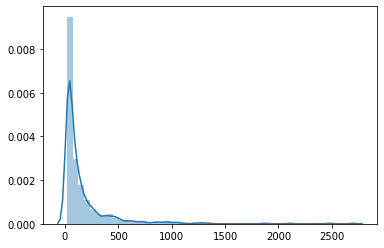

In [15]:
# power law distribution , 멱함수 분포
sns.distplot(users.values)

### 사람들이 많이 보는 영화는?

In [23]:
films=ratings.groupby('movieId')['userId'].count()

In [24]:
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

<AxesSubplot:>

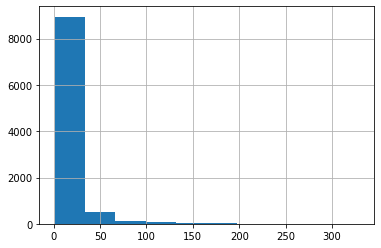

In [25]:
films.hist()

In [28]:
films.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: userId, dtype: int64

In [32]:
movies=pd.read_csv("D:/추천알고리즘강의/data/ml-latest-small/movies.csv", index_col='movieId')

In [34]:
movies.loc[[356, 318, 296, 593, 2517]]

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2517,Christine (1983),Horror


### 겨울왕국 평점보기

In [36]:
movies.loc[106696]

title                                         Frozen (2013)
genres    Adventure|Animation|Comedy|Fantasy|Musical|Rom...
Name: 106696, dtype: object

In [39]:
ratings[ratings['movieId'] == 106696].describe()

,userId,movieId,rating,timestamp
count,29.000000,29.0,29.000000,2.900000e+01
mean,324.000000,106696.0,3.620690,1.473884e+09
std,184.555063,0.0,1.099149,4.126738e+07
min,10.000000,106696.0,0.500000,1.396223e+09
25%,159.000000,106696.0,3.000000,1.444769e+09
50%,306.000000,106696.0,4.000000,1.461352e+09
75%,509.000000,106696.0,4.500000,1.513130e+09
max,596.000000,106696.0,5.000000,1.537158e+09


In [40]:
frozen = ratings[ratings['movieId']==106696]

<AxesSubplot:>

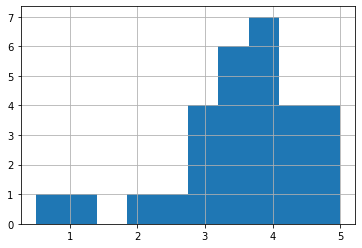

In [41]:
frozen['rating'].hist()

In [47]:
frozen['rating'].sort_values()

88023    0.5
81910    1.0
53458    2.0
22567    2.5
89900    3.0
21852    3.0
84033    3.0
23219    3.0
92080    3.5
16798    3.5
83064    3.5
37282    3.5
58821    3.5
51345    3.5
77938    4.0
46686    4.0
46526    4.0
43914    4.0
35769    4.0
21967    4.0
3572     4.0
37490    4.5
80811    4.5
49886    4.5
1245     4.5
90206    5.0
79732    5.0
25783    5.0
9418     5.0
Name: rating, dtype: float64

<AxesSubplot:>

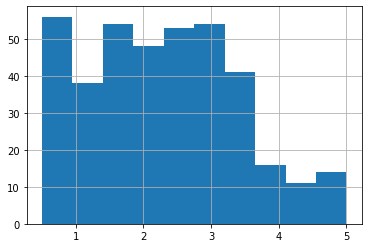

In [54]:
ratings.loc[ratings['userId']==567, 'rating'].hist()

<AxesSubplot:>

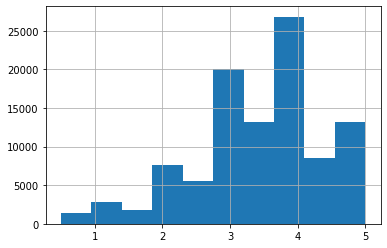

In [55]:
ratings['rating'].hist()